# Job Nature and Company Profiles: -Kmeans Clustering

<b>In this problem, The objective is to see how Job types are changing with years by using clusters.(Kmeans)

<b>Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
import nltk
import re
import string
nltk.download('punkt')
nltk.download('stopwords')

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<b>Load Dataset

In [2]:
# read csv into a DataFrame
data = pd.read_csv('data job posts.csv',parse_dates= ['date'])
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [3]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

<b>Data Cleaning Steps:-

<b>1)Create a dataframe with useful columns

In [4]:
data1=data[['jobpost','Title','JobRequirment','JobDescription','RequiredQual','AboutC','IT','Year']]
data1.head()

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,AboutC,IT,Year
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\nindividu...",NaN,False,2004
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,False,2004
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,False,2004
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",NaN,False,2004
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,- Rendering technical assistance to Database M...,NaN,- University degree; economical background is ...,NaN,True,2004


<b>2)Removing duplicate rows based on Title & Jobpost

In [5]:
print(data1.shape)
df = data1.drop_duplicates(['jobpost','Title'])
print(df.shape)
print("Removed {0} duplicates (based on jobpost + Title)".format(data1.shape[0]-df.shape[0]))

(19001, 8)
(18892, 8)
Removed 109 duplicates (based on jobpost + Title)


<b>3)Data-Peprocessing steps--

In [6]:
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub('\s+', ' ', x))  # remove newlines
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub("\'", "", x))  # remove single quotes
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub('\S*@\S*\s?', '', x))  # remove emails
re1 = '(www)'  # Web address 
re2 = '(\\.)'  # Any Single Character 
re3 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 
rg = re.compile(re1 + re2 + re3, re.IGNORECASE | re.DOTALL)
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub(rg, "", x))
df.jobpost = df.jobpost.apply(lambda x: re.sub('(\\d+)', "", x))  # remove numbers

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

<b>Tokenisation

In [7]:
df['jobpost_token'] = df.jobpost.map(word_tokenize)
df.jobpost_token.head()

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    [AMERIA, Investment, Consulting, Company, JOB,...
1    [International, Research, &, Exchanges, Board,...
2    [Caucasus, Environmental, NGO, Network, (, CEN...
3    [Manoff, Group, JOB, TITLE, :, BCC, Specialist...
4    [Yerevan, Brandy, Company, JOB, TITLE, :, Soft...
Name: jobpost_token, dtype: object

<b>Removing Punctuations,convrsion to lowercase and stopwords removal

In [8]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    # wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    stop.extend(
        ['armenian', 'armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures',
         'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company', 'yerevan',
         'eligibility', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
         'october', 'november', 'december'])
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    # tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_nostop if len(t) >= 3] 
    return tokens_clean

In [9]:
df['jobpost_processed'] = df.jobpost_token.apply(preprocess)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<b>Lemmitisation

In [10]:
def lemmit(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    # wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    stop.extend(
        ['armenian', 'armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures',
         'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company', 'yerevan',
         'eligibility', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
         'october', 'november', 'december'])
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    # tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_nostop if len(t) >= 3] 
    lem = nltk.WordNetLemmatizer()
    tokens_lem = [lem.lemmatize(t) for t in tokens_clean]
    return tokens_lem

In [11]:
df['jobpost_processed'] =df.jobpost_token.apply(lemmit)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['jobpost_processed']

0        [ameria, investment, consulting, chief, financ...
1        [international, research, exchange, board, ire...
2        [caucasus, environmental, ngo, network, cenn, ...
3        [manoff, group, bcc, specialist, manila, phili...
4        [brandy, software, developer, rendering, techn...
5        [boutique, appollo, saleswoman, work, hour, on...
6        [osi, assistance, foundation, branch, office, ...
7        [international, research, exchange, board, ire...
8        [brandy, assistant, managing, director, coordi...
9        [american, embassy, announcement, number, prog...
10       [international, research, exchange, board, ire...
11       [international, research, exchange, board, ire...
12       [institute, sustainable, community, isc, chief...
13       [food, security, regional, cooperation, stabil...
14       [teleplus, llc, general, manager, manage, cont...
15       [netcall, communication, network, administrato...
16       [soc.stockholm, utopian, world, championship, .

<b>Making Bigrams

In [13]:
# Build the bigram model
import gensim
bigram = gensim.models.Phrases(df['jobpost_processed'], min_count=5, threshold=100)  # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [14]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [15]:
df.jobpost_processed = make_bigrams(df.jobpost_processed)

C:\Users\Aanchal\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<b>Test all preprocessing steps in Software Developer Job

In [16]:
tokens_clean = lemmit((df.iloc[4])['jobpost_token']) # we know this is a software job
print(tokens_clean)

['brandy', 'software', 'developer', 'rendering', 'technical', 'assistance', 'database', 'management', 'system', 'realization', 'sql', 'server', 'maintenance', 'activity', 'back-up', 'replication', 'participation', 'designing', 'software', 'development', 'project', 'university', 'degree', 'economical', 'background', 'plus', 'excellent', 'knowledge', 'window', 'server', 'networking', 'tcp/', 'technology', 'sql', 'server', 'visual', 'basic', 'least', 'year', 'experience', 'database', 'software', 'development', 'good', 'knowledge', 'english', 'remuneration', 'commensurate', 'norm', 'accepted', 'successful', 'candidate', 'submit', 'relevant', 'recommendation', 'letter', 'previous', 'employer', 'copy', '-ies', 'diploma', 'relevant', 'certificate', 'available', 'color', 'photo', 'either', 'isakov', 'avenue', 'send', 'following', 'fax', 'e-mail', 'human', 'resource', 'department', 'armine', 'bibilyan', 'please', 'clearly', 'mention', 'letter', 'learned', 'opportunity', 'career', 'center', 'men

<b> Making Wordcloud for Software Developer Job

In [17]:
def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    fd = nltk.FreqDist(tokens)  
    fd.plot(50)

brandy software developer rendering technical assistance database management system realization sql server maintenance activity back-up replication participation designing software development project university degree economical background plus excellent knowledge window server networking tcp/ technology sql server visual basic least year experience database software development good knowledge english remuneration commensurate norm accepted successful candidate submit relevant recommendation letter previous employer copy -ies diploma relevant certificate available color photo either isakov avenue send following fax e-mail human resource department armine bibilyan please clearly mention letter learned opportunity career center mention url website .am thanks place free posting career related opportunity organization careercenter.am website e-mail


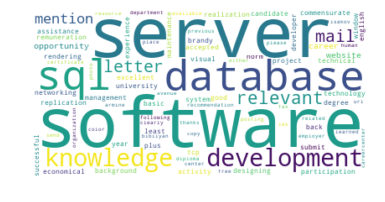

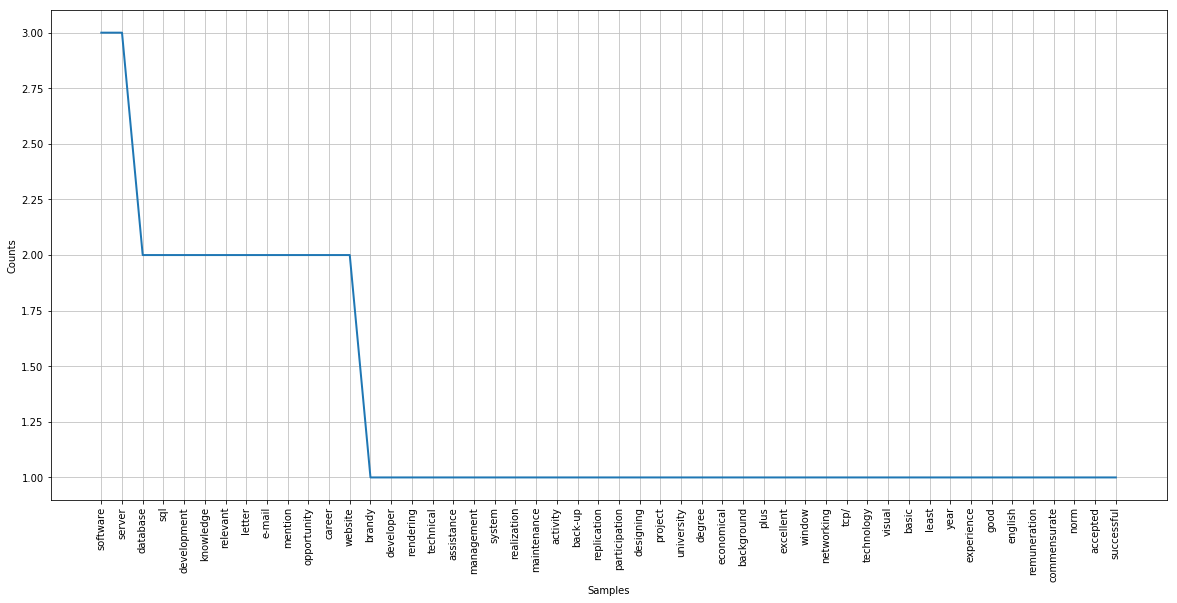

In [18]:
plotWC(tokens_clean)

<b>Get Feature Matrix

In [19]:
print(df.jobpost_processed[8])

['brandy', 'assistant', 'managing', 'director', 'coordinating', 'work', 'subordinate', 'employee', 'maintaining', 'liaison', 'subdivision', 'within', 'managing', 'correspondence', 'flow', 'realizing', 'written', 'verbal', 'translation', 'organizing', 'meeting', 'conference', 'compiling', 'minute', 'meeting', 'drawing', 'report', 'operating', 'office', 'equipment', 'university', 'degree', 'least', 'year', 'experience', 'relevant', 'field', 'mastership', 'office', 'work', 'competency', 'business', 'ethic', 'excellent', 'working', 'knowledge', 'written', 'verbal', 'russian', 'english', 'knowledge', 'french', 'plus', 'knowledge', 'office', 'strong', 'problem-solving', 'organizational', 'skill', 'outstanding', 'interpersonal', 'skill', 'remuneration', 'commensurate', 'norm', 'accepted', 'successful', 'candidate', 'submit', 'relevant', 'recommendation', 'letter', 'previous', 'employer', 'copy', '-ies_diploma', 'color_photo', 'either_isakov', 'avenue', 'send', 'following', 'fax', 'e-mail', 'h

In [20]:
df['jobpost_processedtext'] = df.jobpost_processed.apply(lambda x: ' '.join(x))

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<b>Tf-Idf Vectorization

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [22]:
vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3)
gf_tfidf = vec_tfidf.fit_transform(df['jobpost_processedtext'])
print(gf_tfidf.shape)

(18892, 17075)


In [23]:
print(gf_tfidf)

  (0, 965)	0.09244067828370174
  (0, 8385)	0.24630598000416945
  (0, 3676)	0.08647849957923687
  (0, 2890)	0.06842487335769303
  (0, 6240)	0.3146791235983647
  (0, 10783)	0.05456908484560136
  (0, 13766)	0.020678720397899083
  (0, 9480)	0.09647086955658993
  (0, 3331)	0.0775643427005876
  (0, 6281)	0.13429459720899947
  (0, 586)	0.16851216070322714
  (0, 6663)	0.08167900568812989
  (0, 12333)	0.028237818571629998
  (0, 7401)	0.038556061496344995
  (0, 13201)	0.014055336789871952
  (0, 15234)	0.046613874164805086
  (0, 3399)	0.055153220179844656
  (0, 14514)	0.05801195019821072
  (0, 1541)	0.024744995453668924
  (0, 5841)	0.11924677111640042
  (0, 4731)	0.04956466392675374
  (0, 11435)	0.03761964684347904
  (0, 13107)	0.03761964684347904
  (0, 7393)	0.03611336183474127
  (0, 9077)	0.037647787999984056
  :	:
  (18891, 5541)	0.06890798935464287
  (18891, 7920)	0.08888014047986743
  (18891, 3672)	0.0661486195629112
  (18891, 11273)	0.06559767433494658
  (18891, 7889)	0.06708738647612121
  

<b>TF-IDF Vectorization

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Use SVD to reduce dimensions
svd = TruncatedSVD(2000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(gf_tfidf)

In [66]:
#code to select those components which attribute for 95% of variance in data
count = 0
for index, cumsum in enumerate(np.cumsum(svd.explained_variance_ratio_)):
    if cumsum <=0.95:
      count+=1  
    else:
        break
print(count)

2000


In [67]:
for index, cumsum in enumerate(np.cumsum(svd.explained_variance_ratio_)):
    print(index, cumsum)

0 0.004494835152788621
1 0.02147646523867363
2 0.03336870800759813
3 0.04377444008985885
4 0.05210601381825342
5 0.059156488072354636
6 0.06575229371843995
7 0.07160624798410603
8 0.07704907139694402
9 0.08223395535366418
10 0.0870365751413364
11 0.09156242994453287
12 0.09596605900728433
13 0.100187699629915
14 0.10430016236882064
15 0.10826849170446426
16 0.11215487778009642
17 0.11594281421656917
18 0.11953001193276967
19 0.12298574211703542
20 0.12643129745191278
21 0.12970723056757552
22 0.13289143905930575
23 0.1360221989692552
24 0.13904297206427452
25 0.14199009038883553
26 0.14489497364383608
27 0.14774062297649415
28 0.1504610424301102
29 0.15316391507448893
30 0.15583384256714303
31 0.15840685365674056
32 0.16091629097023324
33 0.16337787861681577
34 0.1658019152569599
35 0.1681592485282725
36 0.17048593297231776
37 0.17276373597420905
38 0.17502347383808595
39 0.17725373467756853
40 0.1794546388159341
41 0.18159424466438379
42 0.1837127417921336
43 0.18580674008014117
44 0.

515 0.5476436393246461
516 0.5480354740192789
517 0.5484265032430629
518 0.5488171403419071
519 0.5492075424456685
520 0.5495971302598612
521 0.5499855803313023
522 0.5503734886646588
523 0.5507610994963176
524 0.5511479271596689
525 0.5515334643869992
526 0.5519184731246216
527 0.5523030046346886
528 0.5526874667791586
529 0.5530709485870298
530 0.5534532853843819
531 0.5538351439236032
532 0.554216784365052
533 0.5545978854396999
534 0.5549781932876032
535 0.5553584351626176
536 0.5557383649191989
537 0.5561174264956842
538 0.5564962447548334
539 0.5568745534838503
540 0.5572514843132601
541 0.5576277080135793
542 0.5580036052734785
543 0.5583789560728828
544 0.5587538842536577
545 0.5591283206154164
546 0.5595024059991869
547 0.559875909705176
548 0.560249233611583
549 0.5606218334457658
550 0.5609940128721569
551 0.5613655824927339
552 0.5617360332688278
553 0.5621056603517182
554 0.56247490350226
555 0.5628434096029864
556 0.5632113166798939
557 0.5635786630341695
558 0.5639459951

912 0.6665135158022963
913 0.6667439458703885
914 0.6669743653808039
915 0.6672044560044017
916 0.6674343795635127
917 0.6676641998893158
918 0.6678937490826586
919 0.66812307989789
920 0.6683521807332129
921 0.66858076915003
922 0.6688091823223262
923 0.6690372521369929
924 0.6692651061404766
925 0.6694925793503208
926 0.6697199912760773
927 0.6699471797789406
928 0.670174165350311
929 0.6704010200247347
930 0.6706274503662919
931 0.6708536176753289
932 0.6710794415622241
933 0.6713048960283088
934 0.6715302301257923
935 0.671755225295755
936 0.6719799099989195
937 0.6722043812054822
938 0.6724286429381809
939 0.6726527885318144
940 0.6728767612364338
941 0.6731002817618581
942 0.6733236856113926
943 0.6735464597874402
944 0.6737690836507733
945 0.6739916114402489
946 0.6742139917134056
947 0.6744361123133444
948 0.6746580002860366
949 0.6748797319772891
950 0.6751013141248653
951 0.6753228453900746
952 0.6755442254954398
953 0.6757648976892677
954 0.6759853773023963
955 0.67620569254

1514 0.7715659144706893
1515 0.7716981750522021
1516 0.7718302700635226
1517 0.7719621524428849
1518 0.7720939444956396
1519 0.772225625939801
1520 0.7723572613814803
1521 0.7724887456273485
1522 0.7726201861634929
1523 0.7727515425893795
1524 0.7728828609281504
1525 0.7730140988413828
1526 0.7731452079063724
1527 0.7732761236434751
1528 0.7734070008712416
1529 0.7735377661788667
1530 0.7736684532283321
1531 0.7737990401139437
1532 0.7739295146657218
1533 0.7740599304300062
1534 0.7741902238194792
1535 0.7743204566912046
1536 0.7744505612165195
1537 0.7745805896437797
1538 0.7747105131498224
1539 0.7748403034375511
1540 0.7749699742333264
1541 0.7750995488463375
1542 0.7752289652483427
1543 0.7753583258178884
1544 0.7754875645437077
1545 0.7756166943393413
1546 0.7757456360819165
1547 0.7758744286081284
1548 0.7760031501369123
1549 0.7761316887320316
1550 0.7762601247071058
1551 0.7763884792019743
1552 0.7765166925610437
1553 0.7766447542057847
1554 0.7767727666709552
1555 0.7769007301

In [68]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 82%


<b>Clustering

In [69]:
from sklearn.cluster import KMeans
from sklearn import metrics
num_clusters = 4

for num in [num_clusters]:
    km3 = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    %time km3.fit(X_lsa)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km3.labels_))

Wall time: 8.2 s
Clusters: 4
Silhouette Coefficient for clusters: 0.016


In [70]:
def print_terms(cm, num):
    original_space_centroids = svd.inverse_transform(cm.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vec_tfidf.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :15]:
            print(' %s' % terms[ind], end='')
        print()

print_terms(km3, num_clusters)

Cluster 0: accounting financial tax accountant finance report chief_accountant prepare audit bank control legislation account reporting cash
Cluster 1: project bank office ability management excellent program development russian service information system good term international
Cluster 2: sale marketing customer product market service manager business client llc excellent ability russian develop brand
Cluster 3: software development design developer web test net team testing java engineer good application ability technology


<b>Cluster 0: Sales and Marketing Jobs

<b>Cluster 1: Project/Program Management and Development

<b>Cluster 2: Financial related jobs (Accounting, Banking)

<b>Cluster 3: Software Developers and Web Design

<b>How these Clusters are change with years

In [71]:
d1 = df[df.Year <= 2007]
d2 = df[df.Year <= 2011]
d3 = df[df.Year <= 2015]

<b>Applying all the abve steps for year 2004 - 2007

In [72]:
# refactor it to a function
def clusterdf(df_in, num):
    vec_tf = CountVectorizer()
    grain_tf = vec_tf.fit_transform(df_in['jobpost_processedtext'])
    vec_tf = CountVectorizer(min_df=2)
    grain_tf = vec_tf.fit_transform(df_in['jobpost_processedtext'])
    vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3, use_idf=True)
    grain_tfidf = vec_tfidf.fit_transform(df_in['jobpost_processedtext'])
    # Use SVD to reduce dimensions
    svd = TruncatedSVD(2000)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    X_lsa = lsa.fit_transform(grain_tfidf)
    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))
    km3 = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    %time km3.fit(X_lsa)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km3.labels_))
    print_terms(km3, num)
    plt.hist(km3.labels_, bins=num)
    plt.title('Cluster Frequencies')
    plt.show()

Explained variance of the SVD step: 95%
Wall time: 2.48 s
Clusters: 4
Silhouette Coefficient for clusters: 0.016
Cluster 0: accounting financial software tax bank finance accountant report cjsc prepare good development credit chief_accountant term
Cluster 1: sale customer marketing bank service manager business market russian excellent product responsible management client cjsc
Cluster 2: software development design developer web net team test ability technical good project testing technology application
Cluster 3: project development management program ability international activity office system ensure support implementation financial team business


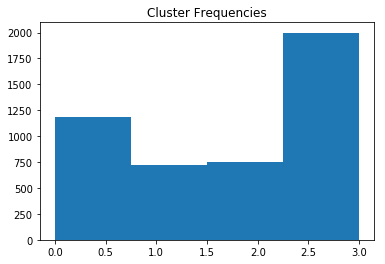

In [73]:
clusterdf(d1, num_clusters)

We see that most of the jobs required are project management 

<b>2008 to 2011

Explained variance of the SVD step: 87%
Wall time: 3.42 s
Clusters: 4
Silhouette Coefficient for clusters: 0.017
Cluster 0: software development design developer web test team net technical ability product testing sale good service
Cluster 1: project development program management international implementation activity support office community ability financial training programme staff
Cluster 2: sale customer bank marketing service russian manager excellent business office client credit product ability market
Cluster 3: accounting financial software development system tax bank report management finance good ability project business cjsc


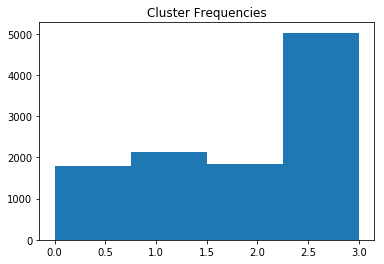

In [74]:
clusterdf(d2, num_clusters)

We see that most of the jobs required are Accounting & Banking Finance

<b>2012-2015

Explained variance of the SVD step: 82%
Wall time: 6.16 s
Clusters: 4
Silhouette Coefficient for clusters: 0.016
Cluster 0: accounting financial tax accountant finance report chief_accountant prepare audit bank control legislation account internal reporting
Cluster 1: sale customer marketing bank service ability russian excellent llc cjsc business office good responsible term
Cluster 2: software development design developer web test net team testing java engineer good application technology ability
Cluster 3: project program development management international training community activity implementation support office programme public staff ability


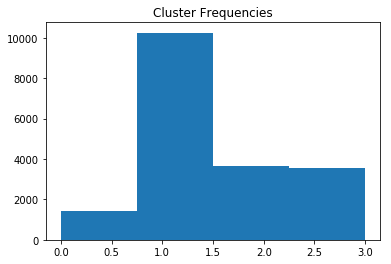

In [75]:
clusterdf(d3, num_clusters)

We see that most of the jobs required are Sale & Marketing